In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_dwi_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_dwi_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_dwi_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_dwi_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_dwi_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_dwi_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  192
Number val images:  11
Number test images:  12


In [4]:
model_name = 'vgg_bayesian_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98215531 0.01784469]
[ 1.         55.03908977]
[0.01800582 4.02604948]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
24/24 [==============================] - 848s 35s/step - loss: 0.0275 - acc: 0.6603 - dice: 0.0906 - iou: 0.0477 - val_loss: 0.0180 - val_acc: 0.8706 - val_dice: 0.0900 - val_iou: 0.0471
Epoch 1
Epoch 1/1
24/24 [==============================] - 838s 35s/step - loss: 0.0167 - acc: 0.7318 - dice: 0.1176 - iou: 0.0627 - val_loss: 0.0278 - val_acc: 0.8914 - val_dice: 0.0829 - val_iou: 0.0432
Epoch 2
Epoch 1/1
24/24 [==============================] - 848s 35s/step - loss: 0.0147 - acc: 0.7867 - dice: 0.1434 - iou: 0.0776 - val_loss: 0.0320 - val_acc: 0.9131 - val_dice: 0.0891 - val_iou: 0.0466
Epoch 3
Epoch 1/1
24/24 [==============================] - 847s 35s/step - loss: 0.0135 - acc: 0.8376 - dice: 0.1809 - iou: 0.1001 - val_loss: 0.0373 - val_acc: 0.9559 - val_dice: 0.1014 - val_iou: 0.0534
Epoch 4
Epoch 1/1
24/24 [==============================] - 843s 35s/step - loss: 0.0125 - acc: 0.8685 - dice: 0.2159 - iou: 0.1223 - val_loss: 0

Epoch 40
Epoch 1/1
24/24 [==============================] - 842s 35s/step - loss: 0.0033 - acc: 0.9772 - dice: 0.6014 - iou: 0.4335 - val_loss: 0.0569 - val_acc: 0.9708 - val_dice: 0.1151 - val_iou: 0.0611
Epoch 41
Epoch 1/1
24/24 [==============================] - 842s 35s/step - loss: 0.0033 - acc: 0.9771 - dice: 0.5998 - iou: 0.4326 - val_loss: 0.0617 - val_acc: 0.9774 - val_dice: 0.1130 - val_iou: 0.0599
Epoch 42
Epoch 1/1
24/24 [==============================] - 848s 35s/step - loss: 0.0033 - acc: 0.9769 - dice: 0.5984 - iou: 0.4309 - val_loss: 0.0641 - val_acc: 0.9755 - val_dice: 0.0954 - val_iou: 0.0501
Epoch 43
Epoch 1/1
24/24 [==============================] - 842s 35s/step - loss: 0.0031 - acc: 0.9780 - dice: 0.6095 - iou: 0.4424 - val_loss: 0.0652 - val_acc: 0.9808 - val_dice: 0.1222 - val_iou: 0.0651
Epoch 44
Epoch 1/1
24/24 [==============================] - 839s 35s/step - loss: 0.0031 - acc: 0.9778 - dice: 0.6076 - iou: 0.4398 - val_loss: 0.0647 - val_acc: 0.9785 - val_d

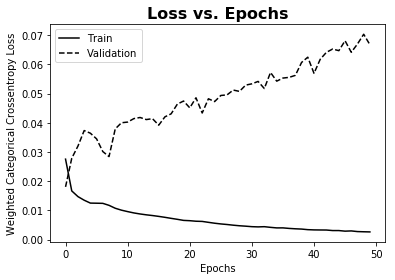

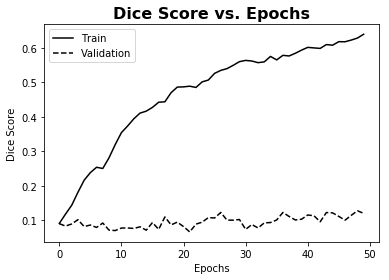

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  42206.400382497


In [14]:
epochs = 49

In [15]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   9461880
           1       0.57      0.99      0.73    171912

   micro avg       0.99      0.99      0.99   9633792
   macro avg       0.79      0.99      0.86   9633792
weighted avg       0.99      0.99      0.99   9633792

F1/dice (binary):  0.7251074315337129
Jaccard/IOU:  0.5687596347086932


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [17]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    547881
           1       0.10      0.17      0.13      4055

   micro avg       0.98      0.98      0.98    551936
   macro avg       0.55      0.58      0.56    551936
weighted avg       0.99      0.98      0.99    551936

F1/dice (binary):  0.1273081562586991
Jaccard/IOU:  0.06798136953721137


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [19]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    586517
           1       0.35      0.48      0.40     15595

   micro avg       0.96      0.96      0.96    602112
   macro avg       0.67      0.73      0.69    602112
weighted avg       0.97      0.96      0.97    602112

F1/dice (binary):  0.4048432665141934
Jaccard/IOU:  0.25379529046623034


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)